# This program uses an artificial recurrent neural network called Long Short Term Memory

## We predict the closing stock price of a corporation (Apple Inc.) using the past 60 days data. 

#### Importing the libraries


In [1]:
import pandas as pd
import math
import numpy as np
import pandas_datareader as web
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#### Get the Stock Quote

In [20]:
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2020-12-30')
#Show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2020-12-23,132.429993,130.779999,132.160004,130.960007,88223700.0,130.764603
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053


In [21]:
df.shape

(2264, 6)

#### Visualize closing price history

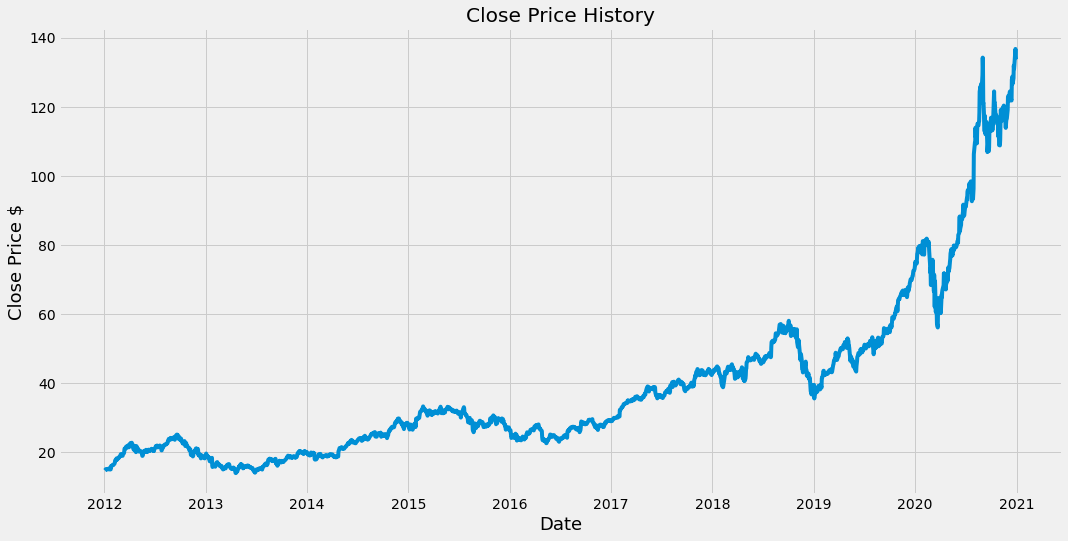

In [22]:
plt.figure(figsize = (16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price $', fontsize=18)
plt.show()

#### Create new Dataframe and convert to Array

In [23]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1812

#### Scale the data

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00602306],
       [0.0066661 ],
       [0.00800165],
       ...,
       [1.        ],
       [0.98517215],
       [0.97580299]])

### Create the training dataset

#### Create the scaled training dataset

In [25]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60: i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00866214, 0.01073094, 0.00869416,
       0.0163321 , 0.01574144, 0.0165125 , 0.01817975, 0.01918941,
       0.01910503, 0.0187937 , 0.02012052, 0.02136877, 0.02278289,
       0.025067  , 0.02986508, 0.02993782, 0.03260892, 0.03460496,
       0.03117444, 0.03249544, 0.03246925, 0.03617329, 0.03564663,
       0.03662137, 0.03837301, 0.03934777, 0.04215562, 0.04420112,
       0.04479179, 0.04499838, 0.04150094, 0.04065712, 0.04078224,
       0.0440702 , 0.04499548, 0.0469828 , 0.0516674 , 0.05791742,
       0.05674772, 0.05675062, 0.06126938, 0.0626835 , 0.06167673,
       0.06075728, 0.05979999, 0.06298027, 0.06516255, 0.06607619])]
[0.06381826722571945]

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00

#### Convert x_train and y_train to numpy arrays

In [26]:
x_train, y_train = np.array(x_train), np.array(y_train)

#### Reshape the data

In [27]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1752, 60, 1)

#### Build the LSTM Model

In [28]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape  = (x_train.shape[1], 1), ))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

#### Compile the model

In [29]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### Train the model


In [30]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1752/1752 [==============================] - 42s 24ms/step - loss: 2.6647e-04


#### Create the testing dataset

In [31]:
test_data = scaled_data[training_data_len-60: ,:]

#### Create x_test and y_test

In [32]:
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

#### Convert data into numpy array

In [33]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#### Get the model's predicted price value

In [34]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#### Get Root Mean Squared Error RMSE

In [35]:
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

4.3511158175173055

### Plot the data

In [36]:
train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-36-fac123c220ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


#### Visualize the data

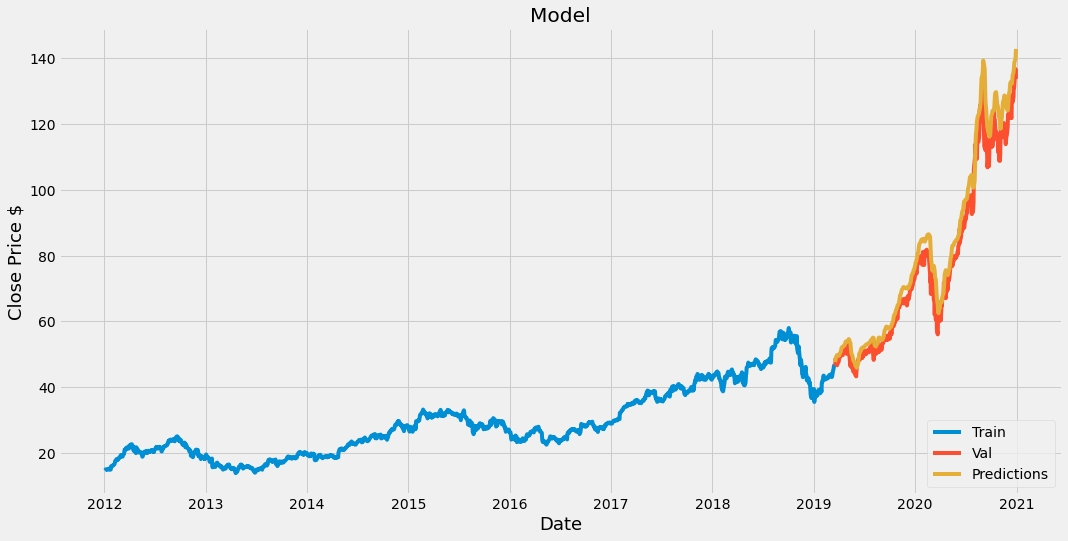

In [37]:
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()